In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host="localhost",
                            username="root",
                            password="Monty@19931513",
                            database="ecommerce")

cur = db.cursor()


## List all unique cities where customers are located.

In [29]:
query = """ select distinct(customer_city) from customers """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


## Count the number of orders placed in 2017.

In [5]:
query = """ select count(order_id) from orders where order_purchase_timestamp = 2017 """

cur.execute(query)
data = cur.fetchall()
"total orders placed in 2017 are", data[0][0]

('total orders placed in 2017 are', 45101)

## Find the total sales per category.

In [30]:
query = """ select upper(products.product_category) category, 
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)
data = cur.fetchall()
data

df = pd.DataFrame(data, columns=['category', "sales"])
df.head()

,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33


## Calculate the percentage of orders that were paid in installments.

In [14]:
query = """ select (sum(case when payment_installments >=1 then 1 
else 0 end)) / count(*) * 100 from payments
"""

cur.execute(query)
data = cur.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

## Count the number of customers from each state. 

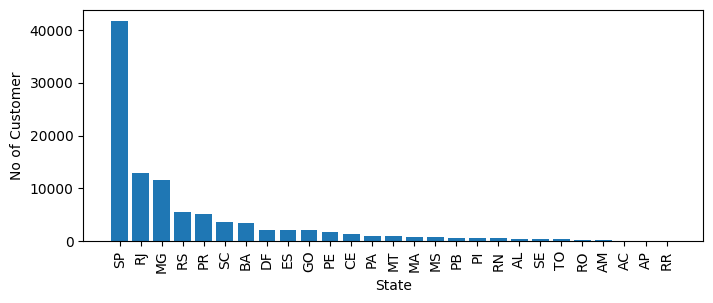

In [41]:
query = """ select customer_state, count(customer_id) 
from customers group by customer_state
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=['state', 'customer_count'])
df = df.sort_values(by='customer_count', ascending=False)

plt.figure(figsize=(8,3))
plt.bar(df['state'], df['customer_count'])
plt.xlabel("State")
plt.ylabel("No of Customer")
plt.xticks(rotation=90)
plt.show()

## Calculate the number of orders per month in 2018

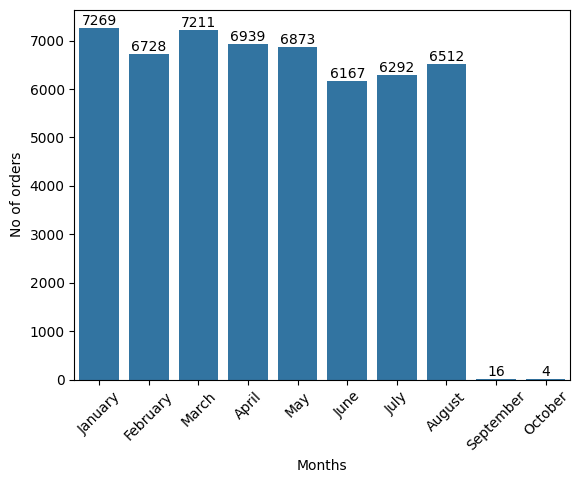

In [53]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count 
from orders where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["months","order_count"])
o = ["January","February","March","April","May","June","July","August","September","October"]


ax = sns.barplot(x=df["months"], y=df['order_count'], order=o)
plt.xlabel("Months")
plt.ylabel("No of orders")
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()